# Исследование надежности заемщиков.

**Цель исследования**

Разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок:
* Есть ли зависимость между количеством детей и возвратом кредита в срок?
* Есть ли зависимость между семейным положением и возвратом кредита в срок?
* Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
* Как разные цели кредита влияют на его возврат в срок?

**Ход исследования**

Входные данные от банка: статистика о платёжеспособности клиентов, о качестве данных ничего не известно.
Исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Поиск ответов на поставленные вопросы.
 
 **Результаты исследования**

Результаты будут учтены при построении модели кредитного скоринга — системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

### Шаг 1. Обзор данных

Для начала импортируем Pandas и другие библиотеки и модули, которые могут понадобиться, прочитаем файл с данными и выведем первые 10 строк для ознакомления с таблицей.

In [1]:
import pandas as pd # импорт библиотеки pandas
import seaborn as sns # импорт библиотеки seaborn для создания графиков
from matplotlib import pyplot as plt # импорт модуля для настройки графиков

In [2]:
df = pd.read_csv('/datasets/data.csv') # чтение файла с данными и сохранение в df
display(df.head(10)) # получение первых 10 строк таблицы df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Запросим общую информацию о датафрейме:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


В таблице 12 столбцов, встречающиеся типы данных — `int`, `float`, `object`.

Согласно документации к данным:
* `children` — количество детей в семье
* `days_employed` — общий трудовой стаж в днях
* `dob_years` — возраст клиента в годах
* `education` — уровень образования клиента
* `education_id` — идентификатор уровня образования
* `family_status` — семейное положение
* `family_status_id` — идентификатор семейного положения
* `gender` — пол клиента
* `income_type` — тип занятости
* `debt` — имел ли задолженность по возврату кредитов
* `total_income` — ежемесячный доход
* `purpose` — цель получения кредита

Количество значений отличается в двух столбцах: `days_employed` и `total_income`, значит, в них есть пропуски.

Также можно заметить:
- отрицательные значения там, где их быть не должно;
- нереалистично высокие значения;
- по-разному записанные одни и те же значения.

### Шаг 2.1 Заполнение пропусков

Ознакомившись с данными в таблице, мы столкнулись с пропусками в двух столбцах — `days_employed` и `total_income`. Сначала посмотрим на общее количество пропущенных значений:

In [4]:
df.isna().sum() # подсчёт пропусков

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В столбцах с пропущенными значениями хранится информация об общем трудовом стаже и ежемесячном доходе, и количество пропусков совпадает, значит можно сделать предположение, что это **неслучайные пропуски** — некоторые клиенты банка не работают и не имеют ежемесячного дохода.

Расчитаем долю пропущенных значений, так как количество пропусков одинаковое, она будет одинакова для обоих столбцов:

In [5]:
# расчет доли пропущенных значений для столбца days_employed
'Доля пропущенных значений в столбцах days_employed и total_income: {:.0%}'.format(df['days_employed'].isna().sum() / len(df['days_employed']))

'Доля пропущенных значений в столбцах days_employed и total_income: 10%'

Значения, хранящиеся в столбцах `days_employed` и `total_income` важны для исследования, пропуски необходимо заполнить для дальнейшей работы. Трудовой стаж и ежемесячный доход (количественные переменные) разных клиентов могут сильно отличаться друг от друга, а значит при расчете среднего показателя по каждому из столбцов мы получим искаженные данные. Поэтому пропуски должны быть заменены медианными значениями.

Сначала обработаем данные столбца `days_employed`, заменив отрицательные значения — они могут повлиять на корректность расчетов:

In [6]:
df['days_employed'] = abs(df['days_employed']) # с помощью функции abs() заменяем все значения в столбце на абсолютные
display(df.head(3))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья


Рассчитаем медианное значение для ежемесячного дохода и заменим им все пропуски:

In [7]:
# переменная для хранения медианного значения по столбцу total_income
df_total_income_median = df['total_income'].median() 
# заполняем пропуски в столбце 'total_income' на медианное значение
df['total_income'] = df['total_income'].fillna(df_total_income_median)

Теперь перейдем к трудовому стажу. Здесь важно обратить внимание на то, что у некоторых клиентов трудовой стаж при переводе в года значительно превышает их возраст. Это окажет серьезное влияние на результат при расчете медианного значения для столбца `'days_employed'`, поэтому мы скорректируем эту аномалию сейчас.

Так как первое подобное значение появилось у клиента, который отличается от остальных только возрастом и видом деятельности, запросим 10 строк клиентов с видом деятельности `'пенсионер'`, чтобы проверить корректность данных.

In [8]:
display(df[df['income_type'] == 'пенсионер'].head(10))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,145017.937533,сыграть свадьбу
18,0,400281.136913,53,среднее,1,вдовец / вдова,2,F,пенсионер,0,56823.777243,на покупку подержанного автомобиля
24,1,338551.952911,57,среднее,1,Не женат / не замужем,4,F,пенсионер,0,290547.235997,операции с коммерческой недвижимостью
25,0,363548.489348,67,среднее,1,женат / замужем,0,M,пенсионер,0,55112.757732,покупка недвижимости
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,145017.937533,строительство жилой недвижимости
30,1,335581.668515,62,среднее,1,женат / замужем,0,F,пенсионер,0,171456.067993,операции с коммерческой недвижимостью
35,0,394021.072184,68,среднее,1,гражданский брак,1,M,пенсионер,0,77805.677436,на проведение свадьбы
50,0,353731.432338,63,среднее,1,женат / замужем,0,F,пенсионер,0,92342.730612,автомобили
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,145017.937533,сыграть свадьбу


Очевидно, что с данными пенсионеров что-то произошло: все значения в столбце `'days_employed'` искажены — они либо нереалистичны, либо отсутствуют. Это явно техническая ошибка, о которой необходимо сообщить. 

К сожалению, у нас нет возможности получить новую выгрузку с исправленными данными, поэтому придется решать проблему самостоятельно. Рассчитаем усредненный трудовой стаж в зависимости от возраста клиента.

Для начала определим максимальный возраст клиентов банка:

In [9]:
# запросим все уникальные значения в столбце 'dob_years' в отсортированном по возрастанию виде
df['dob_years'].sort_values().unique()

array([ 0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75])

Помимо прочего мы обнаружили еще одно некорректное значение — `0`. В этом случае причиной, скорее всего, стал человеческий фактор. Заменим нули средним арифметическим по столбцу:

In [10]:
# используем функцию loc(), чтобы заменить некорректные значения на среднее арифметическое
df.loc[df['dob_years'] == 0, 'dob_years'] = int(df['dob_years'].mean())
# еще раз запросим все уникальные значения в столбце 'dob_years' для проверки
df['dob_years'].sort_values().unique()

array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75])

Теперь все значения в столбце `'dob_years'` корректны. 

Максимальный возраст клиента банка — 75 лет. Среднее количество рабочих дней в году — 247 дней. Будем считать, что человек начинает работать с 18 лет. Это всё допущения, ведь мы не учитываем високосные года, отпуска, больничные, не знаем, когда действительно человек начал работать, но даже с такими допущениями результат будет гораздо ближе к реальности, чем сейчас.

Посчитаем максимальное количество рабочих дней для самого старшего клента банка:

In [11]:
# от возраста клиента отнимаем 18 лет (примерный возраст, в котором начал работать) и умножаем на кол-во рабочих дней
(75-18)*247

14079

Таким образом, значение в столбце `'days_employed'` не должно превышать 14000.

Заменим некорректные значения в датафрейме, найдем медианное значение для пропусков и выведем таблицу с данными пенсионеров для проверки:

In [12]:
# задаем условие для поиска значений в нужном столбце
# заменяем значения, подходящие по условию, на усредненный трудовой стаж, рассчитанный в зависимости от возраста клиента
df.loc[(df['days_employed'] > 14000), 'days_employed'] = (df['dob_years']-18)*247
# переменная для хранения медианного значения по столбцу days_employed
df_days_employed_median = df['days_employed'].median()
# заполняем пропуски в столбце 'days_employed' на медианные значения
df['days_employed'] = df['days_employed'].fillna(df_days_employed_median)
display(df[df['income_type'] == 'пенсионер'].head())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4,0,8645.000000,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
12,0,2194.173062,65,среднее,1,гражданский брак,1,M,пенсионер,0,145017.937533,сыграть свадьбу
18,0,8645.000000,53,среднее,1,вдовец / вдова,2,F,пенсионер,0,56823.777243,на покупку подержанного автомобиля
24,1,9633.000000,57,среднее,1,Не женат / не замужем,4,F,пенсионер,0,290547.235997,операции с коммерческой недвижимостью
25,0,12103.000000,67,среднее,1,женат / замужем,0,M,пенсионер,0,55112.757732,покупка недвижимости


Проверим количество пропусков в таблице после всех операций:

In [13]:
df.isna().sum() # подсчёт пропусков

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Шаг 2.2. Изменение типов данных.

Для удобства работы с таблицей заменим вещественный тип данных в столбцах `days_employed` и `total_income` на целочисленный:

In [14]:
# заменяем вещественный тип данных на целочисленный в обоих столбцах с помощью метода astype()
df[['days_employed', 'total_income']] = df[['days_employed', 'total_income']].astype('int')
display(df.head()) # получение первых 5 строк таблицы df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,8645,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


### Шаг 2.4. Удаление дубликатов.

Теперь проверим данные на наличие дубликатов.

Начнем с проверки на явные дубликаты, посчитаем их:

In [16]:
df.duplicated().sum() # используем метод duplicated() для выявления дубликатов и функцию sum() для подсчета количества

54

Найдено 54 дубликата, которые можно удалить с помощью метода `drop_duplicates()`. Удалим и проверим еще раз количество явных дубликатов:

In [17]:
# используем метод drop_duplicates() для удаления дубликатов и метод reset_index() для обновления индексации
# методу reset_index() передан параметр drop=True, чтобы не создавать в датафрейме столбец index со старыми индексами
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum() # используем метод duplicated() для выявления дубликатов и функцию sum() для подсчета количества

0

Переходим к неявным дубликатам.

В столбце `education` очевидны различия в написании значений. Запросим уникальные значения этого столбца, чтобы проверить, сколько вариантов написания одного и того же значения имеется в таблице:

In [18]:
df['education'].unique() # метод unique() возвращает уникальные значения для столбца 'education'

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

Приведем все символы в столбце к нижнему регистру и проверим результат:

In [19]:
df['education'] = df['education'].str.lower() # с помощью метода str.lower() приводим все символы в столбце к нижнему регистру
df['education'].unique() # выводим обновленный список уникальных значений столбца

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

Проверим уникальные значения в других столбцах, имеющих значение для нашего исследования:

In [20]:
df['family_status'].unique() # выводим список уникальных значений столбца

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

В столбце с данными о семейном положении нет дубликатов, необходимо лишь привести все символы к нижнему регистру, что мы и сделаем уже использованным ранее методом str.lower():

In [21]:
# с помощью метода str.lower() приводим все символы в столбце к нижнему регистру
df['family_status'] = df['family_status'].str.lower() 
df['family_status'].unique() # выводим список уникальных значений столбца

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'не женат / не замужем'], dtype=object)

In [22]:
df['children'].unique() # выводим список уникальных значений столбца

array([ 1,  0,  3,  2, -1,  4, 20,  5])

В столбце с данными о количестве детей есть два некорректных значения: `-1` и `20`. Так как некорректных значений мало и они разного вида, ошибки, скорее всего, появились из-за человеческого фактора.

В данном случае сначала исправим отрицательное значение, а затем разберемся с нереалистично большой цифрой. Будем считать, что `0` в значении `20` был набран по ошибке оператора, и заменим значение на `2`.

In [23]:
df['children'] = abs(df['children']) # с помощью функции abs() заменяем все значения в столбце на абсолютные
df.loc[df['children']==20, 'children'] = 2 # заменяем значение 20 в столбце на 2 с помощью функции loc()
df['children'].unique() # выводим обновленный список уникальных значений столбца

array([1, 0, 3, 2, 4, 5])

В столбце с целью кредита информация дана в свободной форме, из-за чего по смыслу многие значения перекликаются. Мы могли бы заменить похожие значения на какое-либо одно, но в таком случае исчезнет дополнительная информация о целях. Например, если объединить все данные о недвижимости в одно значение, будет неясно, о какой недвижимости идет речь: покупка жилья для семьи, покупка жилья для сдачи и покупка коммерческой недвижимости - очень разные цели, которые несут информацию о заемщике и могут быть использованы для более точной аналитики в дальнейшем.

Поэтому будет логичнее объединить разные значения в категории, что мы и сделаем чуть позже.

А сейчас закончим работу с дубликатами и проверим количество явных дубликатов после исправления значений в столбцах `'education'` и `'children'`.

In [24]:
df.duplicated().sum() # используем метод duplicated() для выявления дубликатов и функцию sum() для подсчета количества

17

Появились еще 17 явных дубликатов, которые мы уберем и еще раз проверим результат:

In [25]:
# используем метод drop_duplicates() для удаления дубликатов и метод reset_index() для обновления индексации
# методу reset_index() передан параметр drop=True, чтобы не создавать в датафрейме столбец index со старыми индексами
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum() # используем метод duplicated() для выявления дубликатов и функцию sum() для подсчета количества

0

### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

В исходной таблице даны как значения столбцов `'education'` и `'family_status'`, так и их `id`. Чтобы не нагружать таблицу, оставим лишь `id`, а сами значения уберем в дополнительные датафреймы, создав таким образом словари, к которым можно будет обращаться для получения информации.

In [26]:
# формируем датафрейм, в который копируем столбцы 'education' и 'education_id'
df_education_dict = df[['education', 'education_id']]
df_education_dict = df_education_dict.drop_duplicates().reset_index(drop=True) # убираем дубликаты
display(df_education_dict) # выводим получившийся датафрейм

,education,education_id
0,высшее,0
1,среднее,1
2,неоконченное высшее,2
3,начальное,3
4,ученая степень,4


In [27]:
# формируем датафрейм, в который копируем столбцы 'family_status' и 'family_status_id'
df_family_status_dict = df[['family_status', 'family_status_id']]
df_family_status_dict = df_family_status_dict.drop_duplicates().reset_index(drop=True) # убираем дубликаты
display(df_family_status_dict) # выводим получившийся датафрейм

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,не женат / не замужем,4


Убираем скопированные в дополнительный датафрейм столбцы.

In [28]:
display(df.drop(['education', 'family_status'], axis=1).head())

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование
4,0,8645,53,1,1,F,пенсионер,0,158616,сыграть свадьбу


Теперь таблица стала менее нагруженной, а необходимую информацию мы сможем получить, обратившись по идентификатору к созданным словарям.

### Шаг 2.6. Категоризация дохода.

Для облегчения работы с данными о доходах разделим их на категории — `A`, `B`, `C`, `D`, `E`. Каждая категория будет соответствовать своему уровню дохода.

Напишем функцию, которая будет определять, к какой из категорий относится каждый клиент:

In [29]:
def category(total_income): # задаем имя функции и аргумент
    if total_income <= 30000: # определяем условия для каждой категории
        return 'E'
    if total_income <= 50000:
        return 'D'
    if total_income <= 200000:
        return 'C'
    if total_income <= 1000000:
        return 'B'
    return 'A' # если ни одно из условий не выполнено, возвращаем эту категорию

df.insert(11, 'total_income_category', 0) # создаем новый столбец рядом с 'total_income'
df['total_income_category'] = df['total_income'].apply(category) # добавляем в столбец данные, возвращаемые функцией category
display(df.head()) # получение первых 5 строк таблицы df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,total_income_category,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,B,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,C,приобретение автомобиля
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,C,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,B,дополнительное образование
4,0,8645,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,C,сыграть свадьбу


### Шаг 2.7. Категоризация целей кредита.

Как было уже сказано ранее, цели кредита оформляются в свободной форме, поэтому многие по смыслу дублирую друг друга. Мы не будем заменять их как дубли, так как "покупка жилья", "покупка квартиры для сдачи" и "покупка коммерческой недвижимости" всё же разные цели и несут разную информацию о заемщиках, эти подробности не стоит удалять.

Мы разделим цели на категории с помощью функции.

In [30]:
def purpose_category(purpose): # задаем имя функции и аргумент
    if 'авто' in purpose: # определяем условия для каждой категории (в строке должна присутствовать часть определенного слова)
        return 'операции с автомобилем'
    if 'недвижимост' in purpose or 'жиль' in purpose:
        return 'операции с недвижимостью'
    if 'свадьб' in purpose:
        return 'проведение свадьбы'
    if 'образован' in purpose:
        return 'получение образования'
    return 'категория не определена' # если ни одно из условий не выполнено, возвращаем эту категорию
df.insert(11, 'purpose_category', 0) # создаем новый столбец рядом с 'total_income'
df['purpose_category'] = df['purpose'].apply(purpose_category)
display(df.head()) # получение первых 5 строк таблицы df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose_category,total_income_category,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,операции с недвижимостью,B,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,операции с автомобилем,C,приобретение автомобиля
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,операции с недвижимостью,C,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,получение образования,B,дополнительное образование
4,0,8645,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,проведение свадьбы,C,сыграть свадьбу


**Выводы**

Предобработка обнаружила три проблемы в данных:

- пропущенные значения;
- артефакты;
- дубликаты — явные и неявные.

Пропущенные значения были заменены медианными показателями по столбцу, так как разброс заработной платы и трудового стажа слишком велик, из-за этого количественные переменные лучше заменять медианными значениями. Числовые значения были приведены к целым числам для удобства работы с таблицей.

Были обнаружены артефакты: отрицательные значения и завышенные значения в трудовом стаже. Обе проблемы решены.

Найдены и устранены явные и неявные дубликаты, что позволит провести более точное исследование.

Часть данных исходной таблицы перенесена в словари, что позволило сделать таблицу удобочитаемой. Для получения необходимых данных можно обратиться по идентификаторам этих словарей.

Проведена категоризация дохода клиентов и целей взятых кредитов. Это облегчит работу с данными и позволит группировать клиентов по введенным категориям.

### Ответы на вопросы.

##### Вопрос 1: Есть ли зависимость между количеством детей и возвратом кредита в срок?

Создадим сводную таблицу с данными о погашенных кредитах и задолженностях, распределенную в зависимости от количества детей в семье.

In [31]:
# создадим сводную таблицу с помощью метода pivot_table
df_pivot_children = df.pivot_table(index=['children'], columns='debt', values='family_status_id', aggfunc='count', fill_value=0)
display(df_pivot_children) # выведем получившуюся таблицу

debt,0,1
children,,
0,13028,1063
1,4410,445
2,1926,202
3,303,27
4,37,4
5,9,0


Посчитаем, какой процент клиентов задерживают выплаты по кредиту, сколько у них детей, и представим данные в виде графика, чтобы сделать его наглядным.

In [32]:
df_pivot_children['percent'] = round((df_pivot_children[1]/(df_pivot_children[1]+df_pivot_children[0]))*100, 1)
display(df_pivot_children)

debt,0,1,percent
children,,,
0,13028,1063,7.5
1,4410,445,9.2
2,1926,202,9.5
3,303,27,8.2
4,37,4,9.8
5,9,0,0.0


<AxesSubplot:ylabel='percent'>

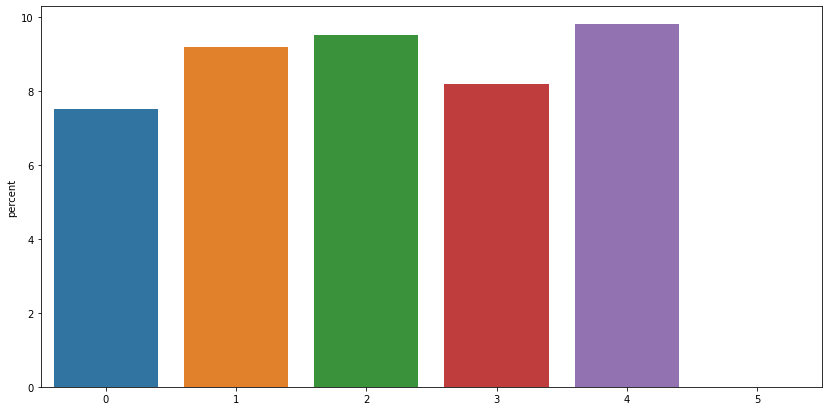

In [33]:
# добавляем столбец percent, который считает процент задолженностей по кредиту
# для клиентов с определенным количеством детей
# с помощью функции round() сокращаем значение до одной цифры после запятой для удобства работы с данными
df_pivot_children['percent'] = round((df_pivot_children[1]/(df_pivot_children[1]+df_pivot_children[0]))*100, 1)

# создание графика для демонстрации результатов расчетов
# увеличиваем размер графика
# создаем список значений для возраста
# передаем возраст в ось x, а процент задолженностей — в ось y
plt.figure(figsize = (14,7))
df_children = [0, 1, 2, 3, 4, 5]
sns.barplot(x=df_children, y=df_pivot_children['percent'])

##### Вывод 1: зависимости нет.

Опираясь на получившийся график, мы можем сказать, что наличие детей оказывает влияние на возврат кредита в срок, так как процент задолженностей у семей без детей самый низкий. Но количество детей уже не имеет значения: семьи с одним, двумя и четырьмя детьми примерно одинаковы по количеству задолженностей, а семьи с тремя детьми несколько "выбиваются" из этого ряда, что бросается в глаза. Причиной такого несоответствия может быть неточность в исходных данных.

Таким образом, имеет смысл обращать внимание только на факт наличия детей, но не на их количество.

##### Вопрос 2: Есть ли зависимость между семейным положением и возвратом кредита в срок?

Создадим сводную таблицу с данными о погашенных кредитах и задолженностях, распределенную в зависимости от семейного положения.

In [34]:
# создадим сводную таблицу с помощью метода pivot_table
df_pivot_family = df.pivot_table(index=['family_status'], columns='debt', values='family_status_id', aggfunc='count')
display(df_pivot_family) # выведем получившуюся таблицу

debt,0,1
family_status,,
в разводе,1110,85
вдовец / вдова,896,63
гражданский брак,3763,388
женат / замужем,11408,931
не женат / не замужем,2536,274


Посчитаем, какой процент клиентов задерживают выплаты по кредиту, посмотрим на их семейный статус и представим данные в виде графика, чтобы сделать его наглядным.

<AxesSubplot:ylabel='percent'>

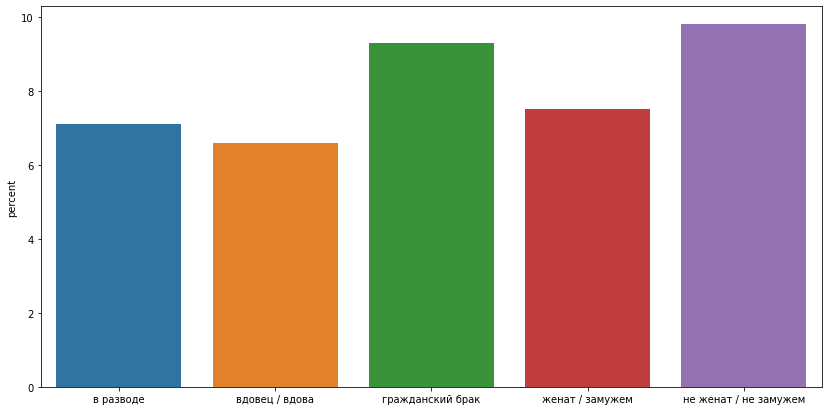

In [35]:
# добавляем столбец percent, который считает процент задолженностей по кредиту
# для клиентов с определенным количеством детей
# с помощью функции round() сокращаем значение до одной цифры после запятой для удобства работы с данными
df_pivot_family['percent'] = round((df_pivot_family[1]/(df_pivot_family[1]+df_pivot_family[0]))*100, 1)

# создание графика для демонстрации результатов расчетов
# увеличиваем размер графика
# создаем список значений для возраста
# передаем возраст в ось x, а процент задолженностей — в ось y
plt.figure(figsize = (14,7))
df_status = ['в разводе', 'вдовец / вдова', 'гражданский брак', 'женат / замужем', 'не женат / не замужем']
sns.barplot(x=df_status, y=df_pivot_family['percent'])

##### Вывод 2: зависимость есть.

Самый высокий процент задержек по кредиту у людей, не состоящих в браке, чуть меньше — у состоящих в гражданском браке.

Вдовцы и вдовы возвращают кредиты вовремя чаще всех, а люди в браке или в разводе примерно на одном уровне.

Семейное положение оказывает влияние на возможность возникновения просрочек по выплате кредита, особенное внимание стоит уделить клиентам, не состоящим в браке или проживающим в гражданском браке.

##### Вопрос 3: Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Создадим сводную таблицу с данными о погашенных кредитах и задолженностях, распределенную в зависимости от уровня дохода.

In [36]:
# создадим сводную таблицу с помощью метода pivot_table
df_pivot_income = df.pivot_table(index=['total_income_category'], columns='debt', values='total_income', aggfunc='count')
display(df_pivot_income) # выведем получившуюся таблицу

debt,0,1
total_income_category,,
A,23,2
B,4685,356
C,14656,1360
D,329,21
E,20,2


Посчитаем, какой процент клиентов задерживают выплаты по кредиту, посмотрим на уровень их дохода и представим данные в виде графика, чтобы сделать его наглядным.

<AxesSubplot:ylabel='percent'>

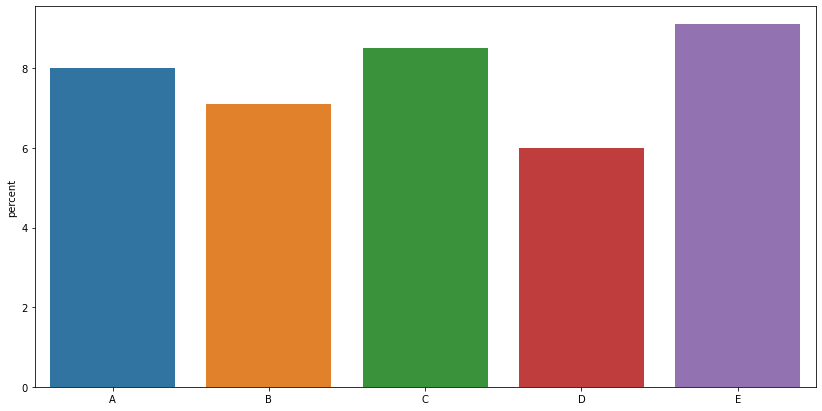

In [37]:
# добавляем столбец percent, который считает процент задолженностей по кредиту
# для клиентов с определенным количеством детей
# с помощью функции round() сокращаем значение до одной цифры после запятой для удобства работы с данными
df_pivot_income['percent'] = round((df_pivot_income[1]/(df_pivot_income[1]+df_pivot_income[0]))*100, 1)

# создание графика для демонстрации результатов расчетов
# увеличиваем размер графика
# создаем список значений для возраста
# передаем возраст в ось x, а процент задолженностей — в ось y
plt.figure(figsize = (14,7))
df_category = ['A', 'B', 'C', 'D', 'E']
sns.barplot(x=df_category, y=df_pivot_income['percent'])

##### Вывод 3: зависимость есть.

Самый высокий процент задержек по кредитным выплатам у клиентов с самым низким доходом (менее 30 000 руб.), а самые аккуратные в своих платежах — клиенты с доходом менее 50 000 руб. в месяц.

Чем меньше денег получает клиент ежемесячно, тем больше соблазн взять кредит, но вернуть его тоже сложнее, чем клиентам с любой другой категорией дохода. Как ни странно, довольно высокий процент задержек у клиентов с высоким доходом (больше 1 000 000 руб.).

##### Вопрос 4: Как разные цели кредита влияют на его возврат в срок?

Создадим сводную таблицу с данными о погашенных кредитах и задолженностях, распределенную в зависимости от уровня дохода.

In [38]:
# создадим сводную таблицу с помощью метода pivot_table
df_pivot_purpose = df.pivot_table(index=['purpose_category'], columns='debt', values='purpose', aggfunc='count')
display(df_pivot_purpose) # выведем получившуюся таблицу

debt,0,1
purpose_category,,
операции с автомобилем,3903,403
операции с недвижимостью,10029,782
получение образования,3643,370
проведение свадьбы,2138,186


Посчитаем, какой процент клиентов задерживают выплаты по кредиту, посмотрим на какие цели они брали кредит и представим данные в виде графика, чтобы сделать его наглядным.

In [39]:
df_pivot_purpose['percent'] = round((df_pivot_purpose[1]/(df_pivot_purpose[1]+df_pivot_purpose[0]))*100, 1)
display(df_pivot_purpose) # выведем получившуюся таблицу

debt,0,1,percent
purpose_category,,,
операции с автомобилем,3903,403,9.4
операции с недвижимостью,10029,782,7.2
получение образования,3643,370,9.2
проведение свадьбы,2138,186,8.0


<AxesSubplot:ylabel='percent'>

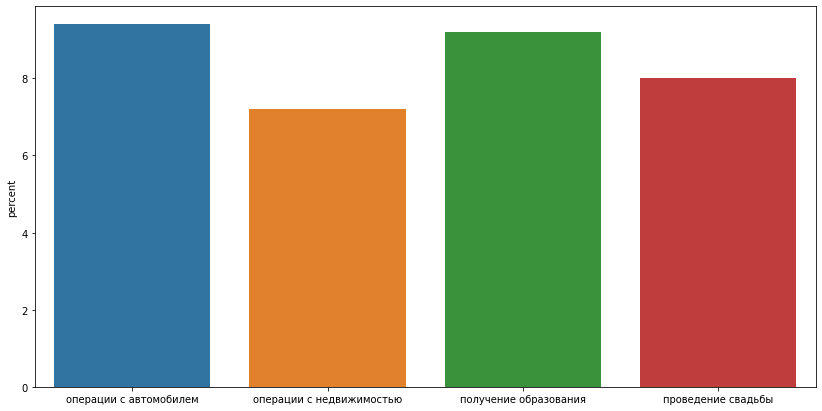

In [40]:
# добавляем столбец percent, который считает процент задолженностей по кредиту
# для клиентов с определенным количеством детей
# с помощью функции round() сокращаем значение до одной цифры после запятой для удобства работы с данными
df_pivot_purpose['percent'] = round((df_pivot_purpose[1]/(df_pivot_purpose[1]+df_pivot_purpose[0]))*100, 1)

# создание графика для демонстрации результатов расчетов
# увеличиваем размер графика
# создаем список значений для возраста
# передаем возраст в ось x, а процент задолженностей — в ось y
plt.figure(figsize = (14,7))
df_purpose_category = ['операции с автомобилем', 'операции с недвижимостью', 'получение образования', 'проведение свадьбы']
sns.barplot(x=df_purpose_category, y=df_pivot_purpose['percent'])

##### Вывод 4: зависимость есть.

Самый высокий процент задолженностей у кредитов на операции с автомобилем и на получение образования, а самый низкий — у кредитов на операции с недвижимостью.

## Общий вывод:

В результате работы были обнаружены проблемы с предоставленными данными:

- некорректные значения;
- дубликаты.

Данные в столбце `days_employed`, скорее всего, хранятся в неподходящем формате, что приводит к некорректным значениям при выгрузке. 

Чтобы снизить число дубликатов, для части клиентской анкеты (образование, семейный статус) можно использовать неизменяемые значения, которые оператор сможет выбирать при заполнении. Так пропадет вероятность опечаток или разного набора одних и тех же значений.

Введение категорий для целей кредита и дохода клиентов поможет в дальнейшем работать с данными и группировать клиентскую базу.

Перед нами стояли четыре вопроса, на которые мы смогли ответить в результате исследования. 

1. Есть ли зависимость между количеством детей и возвратом кредита в срок?

Имеется зависимость между выплатами в срок и наличием детей в принципе - люди без детей реже задерживают платежи. Но количество детей не оказывает существенного влияния.

2. Есть ли зависимость между семейным положением и возвратом кредита в срок?

Зависимость прослеживается: люди, не состоящие в браке или состоящие в гражданском браке, гораздо чаще задерживают выплаты по кредиту. Аккуратнее всех выплачивают кредиты вдовцы.

3. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Зависимость имеется — самый большой процент задержек у клиентов с самой низкой заработной платой (<30000). Но не намного отстают клиенты со средним (<200000) и самым высоким уровнем (>1000000), что стоит иметь в виду. Самыми ответственными оказались клиенты с заработной платой <50000.

4. Как разные цели кредита влияют на его возврат в срок?

Выше всего процент задержек по выплате кредитов на операции с автомобилем и получение образования. Кредиты на операции с недвижимостью возвращают в срок чаще кредитов на другие цели.